<a href="https://colab.research.google.com/github/vogiahuan352/week7/blob/main/Insurance_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url='insurance.csv'
data=pd.read_csv(url)
data.sample(5)

,age,sex,bmi,children,smoker,region,charges
270,18,male,29.370,1,no,southeast,1719.43630
412,26,female,17.195,2,yes,northeast,14455.64405
81,45,female,38.285,0,no,northeast,7935.29115
449,35,male,38.600,1,no,southwest,4762.32900
340,24,female,27.600,0,no,southwest,18955.22017


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64


<Axes: xlabel='smoker', ylabel='count'>

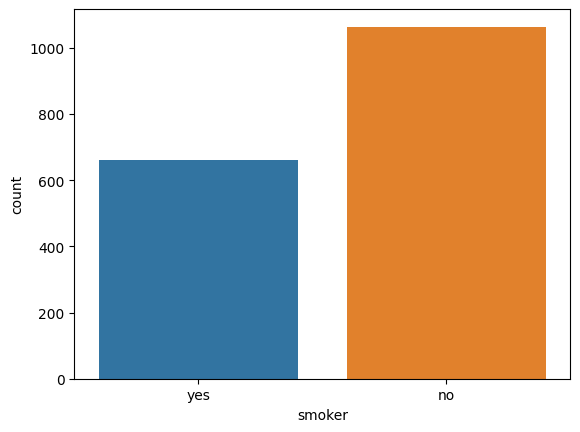

In [ ]:
print(data['sex'].value_counts())
sns.countplot(x='sex',data=data)
print(data['smoker'].value_counts())
sns.countplot(x='smoker',data=data)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


<Axes: xlabel='region', ylabel='count'>

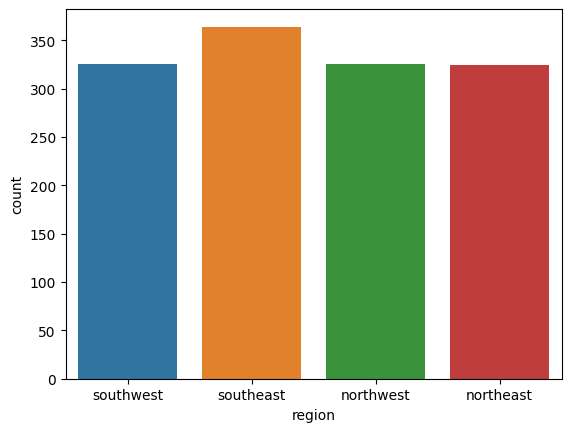

In [ ]:
print(data['region'].value_counts())
sns.countplot(x='region',data=data)

<Axes: >

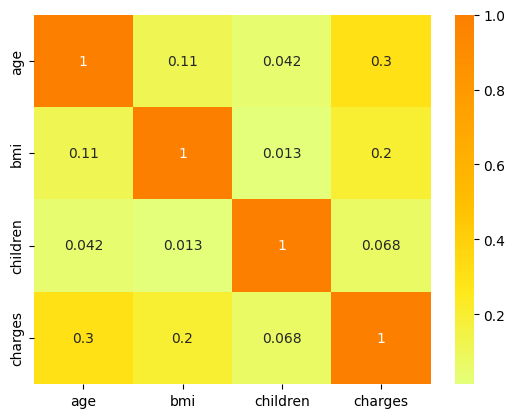

In [ ]:
corr=data.corr()
sns.heatmap(corr,cmap='Wistia',annot=True)

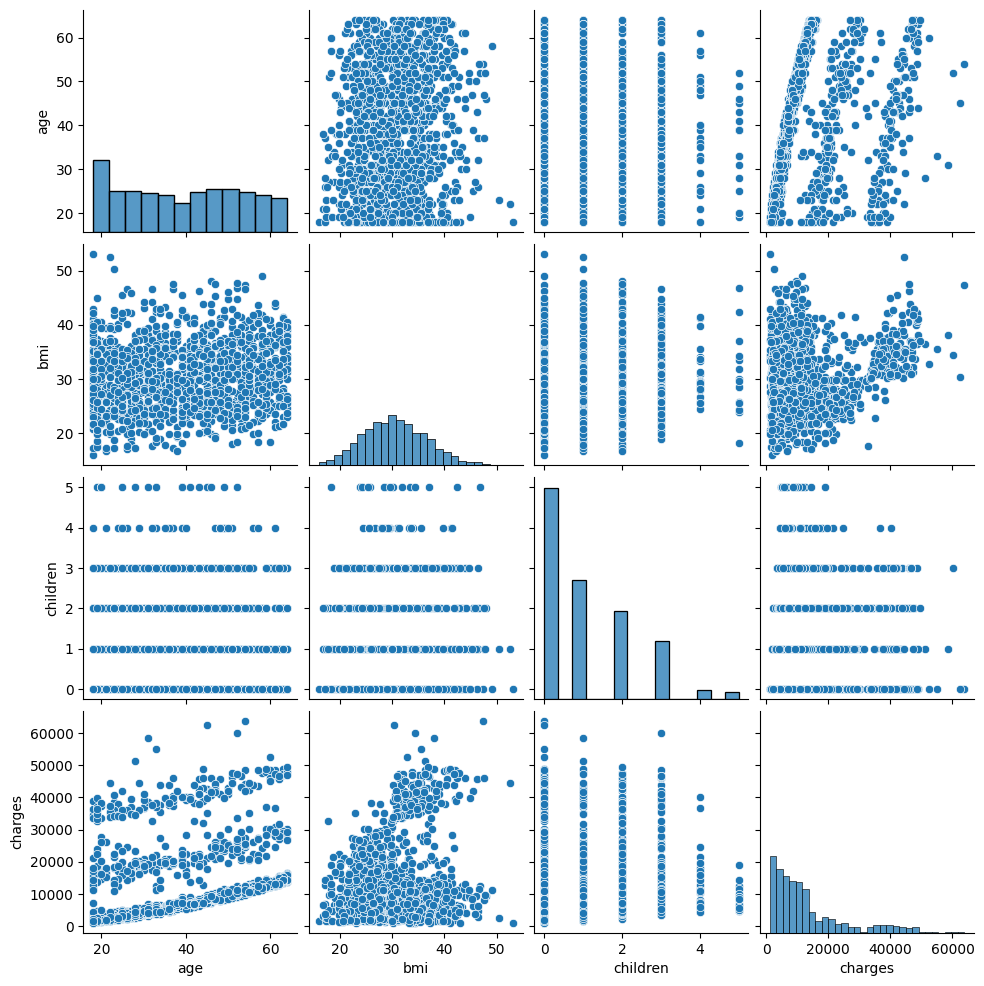

In [ ]:
sns.pairplot(data)

In [ ]:
from sklearn import linear_model


In [ ]:
model=linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['charges']),y=data['bmi'])
print('He so intercept la',model.intercept_)
print('he so coeffient la',model.coef_)
model.score(X=pd.DataFrame(data['charges']),y=data['bmi'])

He so intercept la 29.337977354094626
he so coeffient la [9.98777191e-05]


0.03933913991786253

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


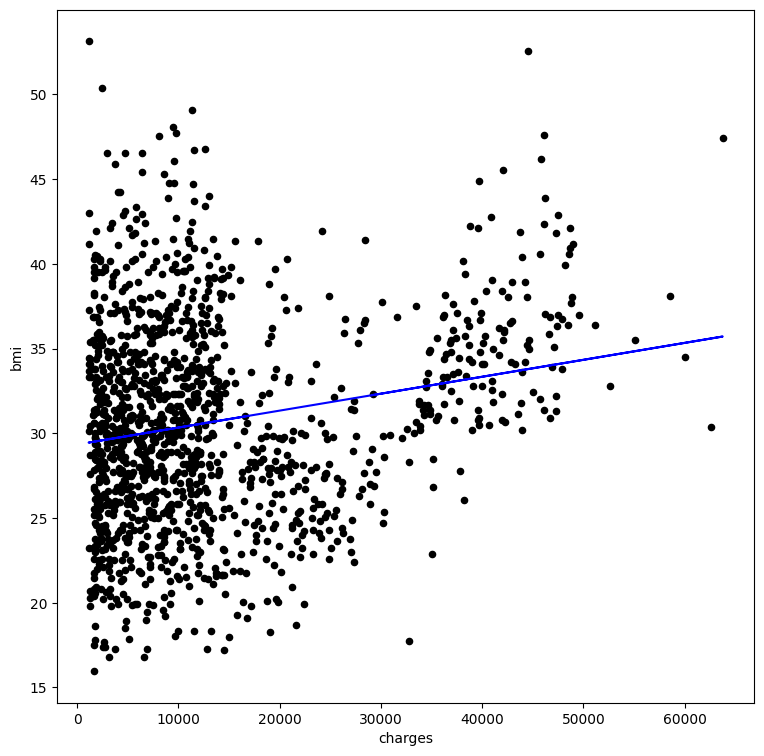

In [ ]:
y_pred=model.predict(X=pd.DataFrame(data['charges']))
data.plot(kind='scatter',x='charges',y='bmi',figsize=(9,9),color='black',)
plt.plot(data['charges'],y_pred,color='blue')

In [ ]:
model=linear_model.LinearRegression()
X=pd.DataFrame([data['charges'],data['charges']**2]).T
model.fit(X,y=data['bmi'])
print('Intercept cua mo hinh:',model.intercept_)
print('Coeffient cua mo hinh:',model.coef_)
print('do chinh xac cua mo hinh:',model.score(X,y=data['bmi']))

Intercept cua mo hinh: 31.01527508961369
Coeffient cua mo hinh: [-1.76001121e-04  6.14830370e-09]
do chinh xac cua mo hinh: 0.06780564203499095


In [ ]:
import numpy as np

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


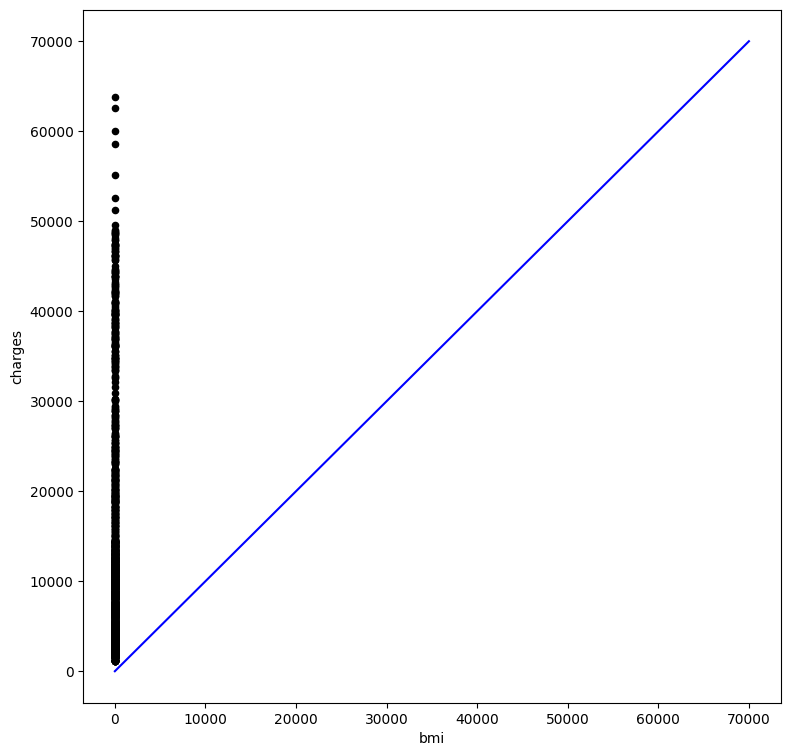

In [ ]:
range=np.arange(0,70000,1)
X_range=pd.DataFrame([range,range**2]).T
y_pred=model.predict(X=X_range)
data.plot(kind='scatter',x='bmi', y='charges',figsize=(9,9),color='black')
plt.plot(range,y_pred,color='blue')

In [ ]:
model=linear_model.LinearRegression()
model.fit(X=data.loc[:,['charges','bmi']],y=data['charges'])
print('intercept la:',model.intercept_)
print('coeffient la:',model.coef_)
print('do chinh xac:',model.score(X=data.loc[:,['charges','bmi']],y=data['charges']))

intercept la: 0.0
coeffient la: [ 1.00000000e+00 -6.09400682e-16]
do chinh xac: 1.0
